# 2m surface temperature data

Anomalies of monthly 2m surface temperature data from [ERA5](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview) from 1979 to present are regridded on an equidistant grid, i.e. fibonachi sphere. The data are stored in an nc-file.

In [26]:
import numpy as np
import geoutils.plotting.plots as gplt
import geoutils.geodata.base_dataset as bds
import climnet.datasets.dataset as cds
import climnet.network.clim_networkx as cnx
import geoutils.utils.time_utils as tu
import geoutils.tsa.time_series_analysis as tsa
import geoutils.tsa.propagation as prop
import geoutils.plotting.plots as cplt
import geoutils.utils.general_utils as gut
import geoutils.utils.time_utils as tu
import geoutils.utils.spatial_utils as sput

from importlib import reload
plot_dir = "/home/strnad/plots/climnet/tutorials/"
data_dir = "/home/strnad/data/"

In [2]:
# open dataset for sst data
reload(cds)
dataset_file = data_dir + \
    f"/climate_data/2.5/era5_t2m_{2.5}_ds.nc"
grid_type = 'fekete'
grid_step = 10
ds_sst = cds.AnomalyDataset(data_nc=dataset_file,
                            month_range=['Jun', 'Sep'],
                            grid_type=grid_type,
                            grid_step=grid_step,
                            sp_grid='fekete_10.npy',
                            )

Total size of '/home/strnad/data//climate_data/2.5/era5_t2m_2.5_ds.nc':
   600.62 MB bytes
['/home/strnad/data//climate_data/2.5/era5_t2m_2.5_ds.nc']
Check dimensions of dataset!
Checked labelling according to netcdf conventions!
Sorted longitudes and latitudes in ascending order!
Set time to np.datetime[ns] time format!
End processing data! Dimensions: ['time', 'lat', 'lon']
Load data from in time range ['1979-01-01', '2019-12-31']!
Select data from Jun - Sep!
Different lon 2.52 and lat 2.5 step!
Finished processing data
Start create grid fekete...
Try to load grid fekete_10.npy...
Load...
Total size of '/home/strnad/projects/climnet/climnet/grid/grids//fekete_10.npy':
   6.15 KB bytes
Loaded grid /home/strnad/projects/climnet/climnet/grid/grids//fekete_10.npy!
Set variable name to t2m!


Intpo100%|██████████████████████████████| 5002/5002 [00:13<00:00, 382.61it/s]

Init spatial mask for shape: (5002, 367)
... Finished Initialization spatial mask
Init the point-idx dictionaries


Compute anomalies for variable t2m.
Created dayofyearly anomalies!
Rename t2m to t2m_an_dayofyear!


In [14]:
# Create the anomaly network
Net = cnx.Clim_NetworkX(dataset=ds_sst, var_name='t2m_an_dayofyear')
corr_method = 'pearson'
density = 0.05
weighted = True
# Create Correlation Climnet
Net.create(method='corr',
            corr_method=corr_method,
            confidence=0.95,
            density=density,
            weighted=weighted,
            )


Create Network based on method corr
(5002, 316)
Created pearson correlation matrix of shape (316, 316)
Minimum Correlation values: 0.20060666005581176
Created adjacency matrix.
Init the network by correlation matrix (316, 316)
Set Edge correlation!
Set dataset attributes to network....


100%|██████████| 316/316 [00:00<00:00, 2323.31it/s]

Finished setting edge corr values!
No isolated nodes!
Re-Init the new network
Init the network by correlation matrix (316, 316)
Set Edge correlation!
Set dataset attributes to network....



100%|██████████| 316/316 [00:00<00:00, 2908.62it/s]

Finished setting edge corr values!
Network Info: {'Num_nodes': 316, 'Num_edges': 1966, 'sparsity': 0.0196883512257651, 'Node_attrs': ['lon', 'lat'], 'Edge_attrs': ['weight', 'corr']}


## Plotting links
Plotting links to a particular location.

number of edges: 1963
Saving figure to /home/strnad/plots/climnet/tutorials//example_t2m_network_fekete_grid_10.png


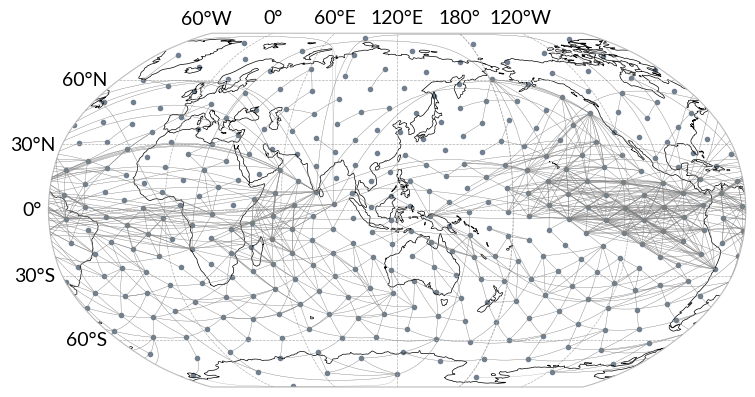

In [20]:
reload(cplt)
plot_edges = True

lon_range = [-180, 180]
lat_range = [-80, 80]

link_dict = Net.get_edges_nodes_for_region(
    lon_range=lon_range, lat_range=lat_range, binary=False
)

lons = ds_sst.grid['lon']
lats = ds_sst.grid['lat']
lon_lat_points = gut.zip_2_lists(lons, lats)
# Plot the grid
im = cplt.plot_map(
    lon_lat_points,
    plot_type='points',
    # title='Fekete Grid',
    projection='Robinson',
    figsize=(9, 5),
    central_longitude=120,
    color='slategray',
    size=3,
)
if plot_edges:
    im = cplt.plot_edges(
        Net.ds,
        link_dict['el'][:],
        ax=im['ax'],
        orientation="vertical",
        plt_grid=True,
        lw=0.2,
        alpha=0.8,
        color="grey",
    )

    savepath= f'{plot_dir}/example_t2m_network_fekete_grid_{grid_step}.png'
else:
    savepath= f'{plot_dir}/example_t2m_fekete_grid_{grid_step}.png'
cplt.save_fig(savepath)

Saving figure to /home/strnad/plots/climnet/tutorials//example_network_adjacency_10.png


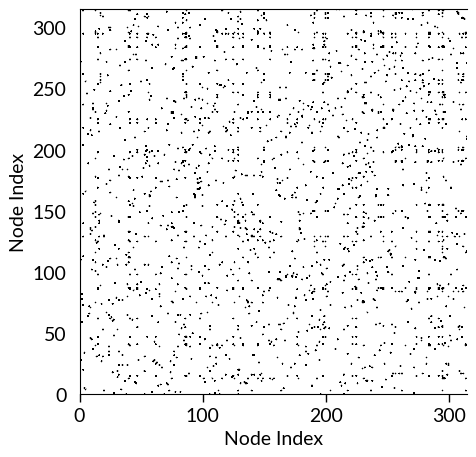

In [25]:
# plot the adjacency matrix
reload(cplt)
im= cplt.plot_2D(
    x=np.arange(len(Net.adjacency)),
    y=np.arange(len(Net.adjacency)),
    plot_type='contourf',
    vmin=0, vmax=1, levels=3,
    cmap='Greys',
    figsize=(5, 5),
    z=Net.adjacency,
    xlabel='Node Index',
    ylabel='Node Index',
    set_ticks=False,
    set_spines=True,)
savepath= f'{plot_dir}/example_network_adjacency_{grid_step}.png'
cplt.save_fig(savepath)

Saving figure to /home/strnad/plots/climnet/tutorials//example_ts_[0, 0].png


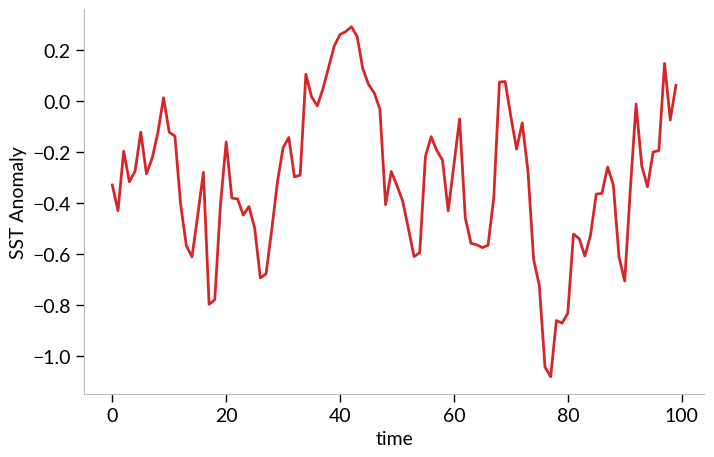

In [63]:
# plot specific time series
reload(sput)
reload(cplt)
loc1 = [0, 0]
ts1 = ds_sst.get_data_for_coord(lon=loc1[0], lat=loc1[1], var='t2m_an_dayofyear').mean(dim='points')

cplt.plot_xy(ts1[0:100],
             color='tab:red',
             xlabel='time',
             ylabel='SST Anomaly',
             lw=2)
savepath= f'{plot_dir}/example_ts_{loc1}.png'
cplt.save_fig(savepath)

Saving figure to /home/strnad/plots/climnet/tutorials//example_ts_[-20, 0].png


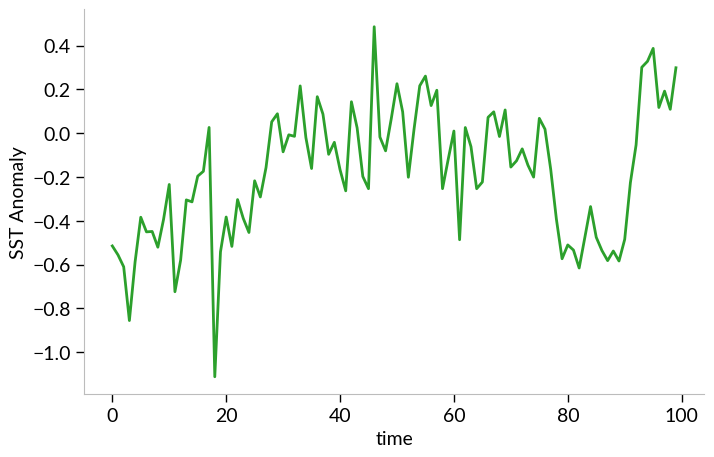

In [62]:
reload(cplt)
loc2 = [-20, 0]
ts2 = ds_sst.get_data_for_coord(lon=loc2[0], lat=loc2[1], var='t2m_an_dayofyear').mean(dim='points')
cplt.plot_xy(ts2[0:100],
             color='tab:green',
             xlabel='time',
             ylabel='SST Anomaly',
             lw=2)
savepath= f'{plot_dir}/example_ts_{loc2}.png'
cplt.save_fig(savepath)

Saving figure to /home/strnad/plots/climnet/tutorials/toy_model_network.png


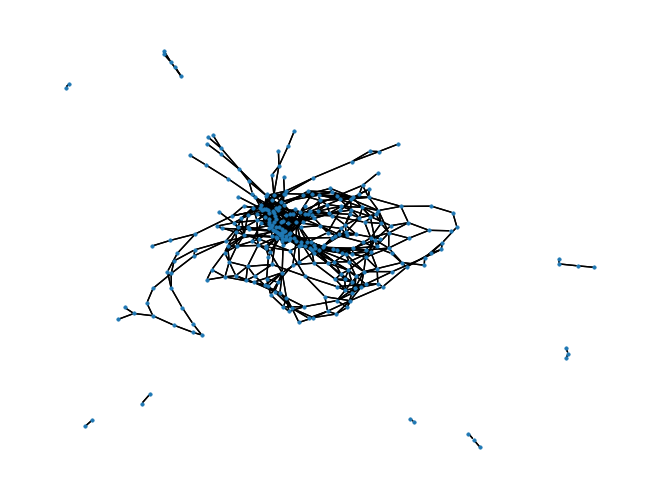

In [69]:
# plot the graph
import networkx as nx
G = Net.cnx
my_pos = nx.spring_layout(G, seed=32, weight=None)
nx.draw(G, my_pos, node_size=6, arrowstyle='-')
cplt.save_fig(plot_dir + f"toy_model_network.png",
              )


